In [16]:
%matplotlib inline
import os
import cv2
import json
import math
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.animation as animation

from components.AttractorLayer import AttractorLayer
from components.RadarLoader import RadarLoader

In [17]:
TAU = 1  # TODO: I don't know whether this is important
INTENSITY =1
BETA =1  # TODO : Check this
SIGMA =1.3 # TODO: Check this
SHIFT = 0.0 # TODO : Check this
CUTOFF_DIST = 10 # TODO : Change this
X_EYE = 10.0
Y_EYE = 1.0

RES_X = 64

In [18]:
path = []
x = 30
y = 1
while 0 < x < 63 and 0 < y < 63:
    
    x += random.randint(-1,1)
    y += random.randint(0,1)
    path.append(x + y*RES_X)
    
print(len(path))

117


In [19]:
datastream = []

for point in path:
    activations = []
    distances = []
    j = point
    grid = np.empty((RES_X,RES_X))

    for i in range(0,RES_X*RES_X):
        dist = np.sqrt(
                X_EYE * (i // RES_X - j // RES_X) ** 2 + Y_EYE *(i % RES_X - j % RES_X) ** 2
            )
        if dist > CUTOFF_DIST:
            transfer_func = 0
        else:
            transfer_func = BETA * ( ( INTENSITY *
                         np.exp(-dist / (SIGMA ** 2))
                    ) - SHIFT)

        distances.append(dist)
        activations.append(transfer_func)
        grid[i//RES_X][i%RES_X] = transfer_func
    datastream.append(grid.copy())


117


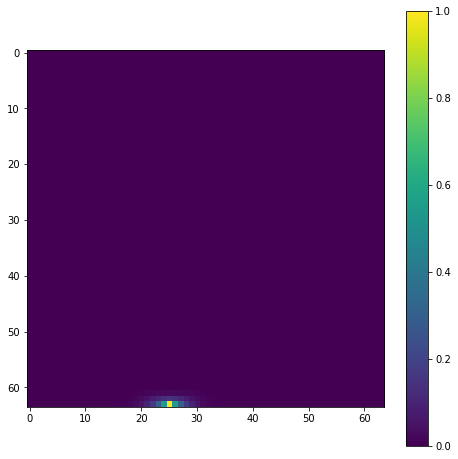

In [21]:
print(len(datastream))
fig, ax = plt.subplots(figsize=(8,8))

cell_dists_map = ax.imshow(np.array(datastream[-1]))
fig.colorbar(cell_dists_map)
fig.savefig("inter_neuron.png")
plt.show()
